In [47]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

from nengo_learn_assoc_mem.utils import make_alt_vocab

In [18]:
def calc_clust_val(vecs, mean_vec) -> float:
    space = []
    for vec in vecs:
        space.append(np.dot(vec, mean_vec))
   
    return np.mean(space)

In [19]:
n_items = 16

In [31]:
clust_vals = []

for dimensions in (32, 64, 128):
    for seed in range(20):
        vocab, fan1, fan1_pair_vecs, fan2, fan2_pair_vecs, \
        foil1, foil1_pair_vecs, foil2, foil2_pair_vecs = make_alt_vocab(n_items, n_items, dimensions, seed, norm=True)

        mean_fan1 = np.mean(fan1_pair_vecs, axis=0)
        mean_fan1 /= np.linalg.norm(mean_fan1)

        mean_fan2 = np.mean(fan2_pair_vecs, axis=0)
        mean_fan2 /= np.linalg.norm(mean_fan2)

        clust_vals.append((
            "fan1",
            calc_clust_val(fan1_pair_vecs, mean_fan1),
            dimensions
        ))

        clust_vals.append((
            "fan2",
            calc_clust_val(fan2_pair_vecs, mean_fan2),
            dimensions
        ))

In [32]:
df = pd.DataFrame(clust_vals, columns=("fan", "clust", "dims"))

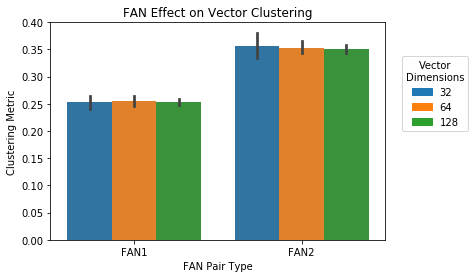

In [48]:
ax = sns.barplot(x="fan", y="clust", hue="dims", data=df)
ax.set_title("FAN Effect on Vector Clustering")
ax.set_ylabel("Clustering Metric")
ax.set_xlabel("FAN Pair Type")
ax.set_xticklabels(["FAN1", "FAN2"])

leg_handles = [mpatches.Patch(color=f"C{a_i}", label=str(nm)) for a_i, nm in enumerate((32, 64, 128))]

leg = plt.legend(handles=leg_handles, title="Vector\nDimensions", loc=(1.05, 0.5))
plt.setp(leg.get_title(), multialignment="center")

plt.savefig(os.path.join("plots", "fan_clust.pdf"), format="pdf", bbox_inches="tight")

[None, None]

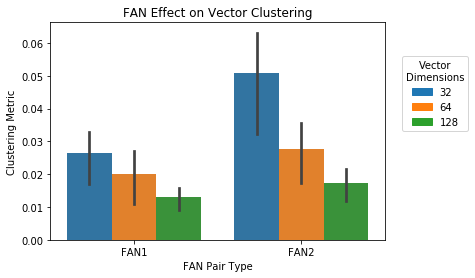

In [50]:
ax = sns.barplot(x="fan", y="clust", hue="dims", data=df, estimator=np.std)
ax.set_title("FAN Effect on Vector Clustering")
ax.set_ylabel("Clustering Metric")
ax.set_xlabel("FAN Pair Type")
ax.set_xticklabels(["FAN1", "FAN2"])

leg_handles = [mpatches.Patch(color=f"C{a_i}", label=str(nm)) for a_i, nm in enumerate((32, 64, 128))]

leg = plt.legend(handles=leg_handles, title="Vector\nDimensions", loc=(1.05, 0.5))
plt.setp(leg.get_title(), multialignment="center")

Didn't Aaron have a different way of creating Semantic Pointers with a limit on how similar they would be? I should probably try that.